<a href="https://colab.research.google.com/github/databyhuseyn/DeepLearning/blob/main/training_deep_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

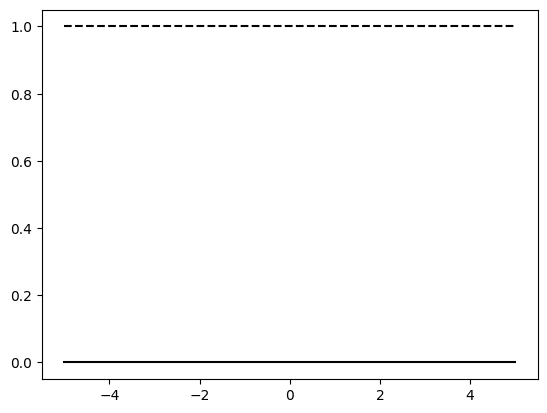

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5,5], [1, 1], 'k--')

# Xavier and He Initialization

In [ ]:
import tensorflow as tf
dense = tf.keras.layers.Dense(50, activation='relu',
                              kernel_initializer='he_normal')

In [ ]:
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                                    distribution='uniform')
dense = tf.keras.layers.Dense(50, activation='sigmoid',
                              kernel_initializer=he_avg_init)

# Nonsaturating Activation Functions

# Leaky Relu

In [ ]:
def leaky_relu(z, alpha):
  return np.maximum(alpha * z, z)

z = np.linspace(-5, 5 , 200)

In [ ]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)     # defaults to alpha=0.3
dense= tf.keras.layers.Dense(50, activation=leaky_relu,
                             kernel_initializer='he_normal')

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, kernel_initializer='he_normal'),   # no activation
    tf.keras.layers.LeakyReLU(alpha=0.2)      # activation as a separate layer
])

# ELU

In [ ]:
dense = tf.keras.layers.Dense(50, activation='elu',
                              kernel_initializer='he_normal')

# SELU

# ancaq chox deep neural networklerde istifade olunur, amma dense-den bashqa hec bir layer olmamalidi ve data normalized olmalidi, lecun initializer olmalidi

In [ ]:
desne = tf.keras.layers.Dense(50, activation='selu',
                              kernel_initializer='lecun_normal')

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
  model.add(tf.keras.layers.Dense(100, activation='selu',
                                  kernel_initializer='lecun_normal'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ["T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [ ]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 65s 25ms/step - loss: 1.2574 - accuracy: 0.5116 - val_loss: 0.8763 - val_accuracy: 0.6810
Epoch 2/5
1719/1719 [==============================] - 43s 25ms/step - loss: 1.0627 - accuracy: 0.6058 - val_loss: 0.9099 - val_accuracy: 0.6828
Epoch 3/5
1719/1719 [==============================] - 42s 24ms/step - loss: 0.7698 - accuracy: 0.7135 - val_loss: 0.6722 - val_accuracy: 0.7562
Epoch 4/5
1719/1719 [==============================] - 42s 24ms/step - loss: 0.6403 - accuracy: 0.7605 - val_loss: 0.6024 - val_accuracy: 0.7756
Epoch 5/5
1719/1719 [==============================] - 47s 27ms/step - loss: 0.6109 - accuracy: 0.7743 - val_loss: 0.6517 - val_accuracy: 0.7574


In [ ]:
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
  model.add(tf.keras.layers.Dense(100, activation='relu',
                                  kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 59s 25ms/step - loss: 1.9694 - accuracy: 0.2309 - val_loss: 1.9611 - val_accuracy: 0.2108
Epoch 2/5
1719/1719 [==============================] - 42s 25ms/step - loss: 1.5101 - accuracy: 0.4018 - val_loss: 1.3658 - val_accuracy: 0.4276
Epoch 3/5
1719/1719 [==============================] - 42s 25ms/step - loss: 1.0432 - accuracy: 0.5600 - val_loss: 0.8600 - val_accuracy: 0.6412
Epoch 4/5
1719/1719 [==============================] - 42s 24ms/step - loss: 0.9167 - accuracy: 0.6278 - val_loss: 0.7969 - val_accuracy: 0.6874
Epoch 5/5
1719/1719 [==============================] - 42s 24ms/step - loss: 0.9550 - accuracy: 0.6206 - val_loss: 0.8279 - val_accuracy: 0.6870


# GELU, Swish and Mish

In [ ]:
def swish(z, beta=1):
  return z * sigmoid(beta * z)

def approx_gelu(z):
  return swish(z, beta=1.702)

def softplus(z):
  return np.log(1 + np.exp(z))

def mish(z):
  return z * np.tanh(softplus(z))

# Batch Normalization

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',
              metrics='accuracy')
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 [==============================] - 11s 5ms/step - loss: 0.5465 - accuracy: 0.8084 - val_loss: 0.3955 - val_accuracy: 0.8562
Epoch 2/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4011 - accuracy: 0.8570 - val_loss: 0.3575 - val_accuracy: 0.8684


In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

data activation functiona chatmazdan once normalize olmalidi


Batch Normalization Computer Vision uchun chox yaxshidi

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer='he_normal', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(100, kernel_initializer='he_normal', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',
              metrics='accuracy')
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6004 - accuracy: 0.7978 - val_loss: 0.4233 - val_accuracy: 0.8478
Epoch 2/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4268 - accuracy: 0.8501 - val_loss: 0.3705 - val_accuracy: 0.8648


# Gradient Clipping for RNN

In [ ]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)        # 1den balaca olanlara deymir, ondan boyukleri normalize edir  (bir nov learning_rate i azaldir her ikisi)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)

In [ ]:
optimizer=tf.keras.optimizers.SGD(clipnorm=1.0)           # butun datani max 1 olmaq sherti ile normalize edir
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)

# Reusing Pretrained Layers

In [ ]:
pos_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")

def split_dataset(X, y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(8)):
        y_A[y_A == old_class_id] = new_class_id  # reorder class ids for A
    return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [ ]:
tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(8, activation='softmax')

])

model_A.compile(loss='sparse_categorical_crossentropy',
                optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics='accuracy')
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                      validation_data=(X_valid_A, y_valid_A))
model_A.save('my_model_A')

Epoch 1/20
1376/1376 [==============================] - 5s 3ms/step - loss: 1.3050 - accuracy: 0.6094 - val_loss: 0.7637 - val_accuracy: 0.7543
Epoch 2/20
1376/1376 [==============================] - 5s 4ms/step - loss: 0.6422 - accuracy: 0.7924 - val_loss: 0.5403 - val_accuracy: 0.8240
Epoch 3/20
1376/1376 [==============================] - 5s 3ms/step - loss: 0.5057 - accuracy: 0.8388 - val_loss: 0.4541 - val_accuracy: 0.8538
Epoch 4/20
1376/1376 [==============================] - 5s 3ms/step - loss: 0.4364 - accuracy: 0.8611 - val_loss: 0.4029 - val_accuracy: 0.8691
Epoch 5/20
1376/1376 [==============================] - 5s 4ms/step - loss: 0.3928 - accuracy: 0.8731 - val_loss: 0.3717 - val_accuracy: 0.8754
Epoch 6/20
1376/1376 [==============================] - 4s 3ms/step - loss: 0.3636 - accuracy: 0.8800 - val_loss: 0.3495 - val_accuracy: 0.8807
Epoch 7/20
1376/1376 [==============================] - 5s 4ms/step - loss: 0.3434 - accuracy: 0.8841 - val_loss: 0.3342 - val_accuracy:

In [ ]:
tf.random.set_seed(42)
model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_B.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))
model.evaluate(X_test_B, y_test_B)

Epoch 1/20
7/7 [==============================] - 2s 55ms/step - loss: 0.7486 - accuracy: 0.4400 - val_loss: 0.7201 - val_accuracy: 0.4807
Epoch 2/20
7/7 [==============================] - 0s 17ms/step - loss: 0.7169 - accuracy: 0.4750 - val_loss: 0.6954 - val_accuracy: 0.5391
Epoch 3/20
7/7 [==============================] - 0s 17ms/step - loss: 0.6900 - accuracy: 0.5550 - val_loss: 0.6734 - val_accuracy: 0.6142
Epoch 4/20
7/7 [==============================] - 0s 18ms/step - loss: 0.6644 - accuracy: 0.6700 - val_loss: 0.6576 - val_accuracy: 0.6855
Epoch 5/20
7/7 [==============================] - 0s 16ms/step - loss: 0.6469 - accuracy: 0.7400 - val_loss: 0.6431 - val_accuracy: 0.7290
Epoch 6/20
7/7 [==============================] - 0s 16ms/step - loss: 0.6310 - accuracy: 0.7750 - val_loss: 0.6311 - val_accuracy: 0.7666
Epoch 7/20
7/7 [==============================] - 0s 16ms/step - loss: 0.6176 - accuracy: 0.8150 - val_loss: 0.6194 - val_accuracy: 0.7982
Epoch 8/20
7/7 [===========

4.010115146636963

In [ ]:
model_A = tf.keras.models.load_model("my_model_A")
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])         # output layeri goturme
model_B_on_A.add(tf.keras.layers.Dense(1, activation='sigmoid'))      # onun yerine bunu elave et


In [ ]:
tf.random.set_seed(42)

In [ ]:
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())          # A modelinin clonunu gotururuk ki, B_on_A-i yeniden fit etsek, A-nin parametrleri yeniden deyishecek. Ona gore clone yaradiriq ve A modelinin weight-lerini gotururuk

In [ ]:
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
for layer in model_B_on_A.layers[:-1]:
  layer.traniable = False                                     # bele edirik ki, A modelinin parametrleri deyishmesin

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B_on_A.compile(loss='binary_crossentropy', optimizer=optimizer,
                     metrics=['accuracy'])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 1s 70ms/step - loss: 0.6533 - accuracy: 0.6950 - val_loss: 0.5480 - val_accuracy: 0.7517
Epoch 2/4
7/7 [==============================] - 0s 33ms/step - loss: 0.4935 - accuracy: 0.7900 - val_loss: 0.5009 - val_accuracy: 0.8150
Epoch 3/4
7/7 [==============================] - 0s 25ms/step - loss: 0.4502 - accuracy: 0.8400 - val_loss: 0.4742 - val_accuracy: 0.8348
Epoch 4/4
7/7 [==============================] - 0s 25ms/step - loss: 0.4171 - accuracy: 0.8700 - val_loss: 0.4413 - val_accuracy: 0.8645


In [ ]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B_on_A.compile(loss='binary_crossentropy', optimizer=optimizer,
                     metrics='accuracy')
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 [==============================] - 1s 40ms/step - loss: 0.3943 - accuracy: 0.8750 - val_loss: 0.4239 - val_accuracy: 0.8605
Epoch 2/16
7/7 [==============================] - 0s 18ms/step - loss: 0.3727 - accuracy: 0.8900 - val_loss: 0.3982 - val_accuracy: 0.8882
Epoch 3/16
7/7 [==============================] - 0s 16ms/step - loss: 0.3500 - accuracy: 0.9050 - val_loss: 0.3829 - val_accuracy: 0.8971
Epoch 4/16
7/7 [==============================] - 0s 16ms/step - loss: 0.3336 - accuracy: 0.9150 - val_loss: 0.3663 - val_accuracy: 0.9060
Epoch 5/16
7/7 [==============================] - 0s 17ms/step - loss: 0.3194 - accuracy: 0.9250 - val_loss: 0.3546 - val_accuracy: 0.9011
Epoch 6/16
7/7 [==============================] - 0s 17ms/step - loss: 0.3105 - accuracy: 0.9350 - val_loss: 0.3421 - val_accuracy: 0.9139
Epoch 7/16
7/7 [==============================] - 0s 17ms/step - loss: 0.2961 - accuracy: 0.9300 - val_loss: 0.3425 - val_accuracy: 0.9001
Epoch 8/16
7/7 [===========

In [ ]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.2862 - accuracy: 0.9085


[0.286216139793396, 0.9085000157356262]

In [ ]:
(1 - (100 - 93.67) / (100 - 88.33)) * 100

45.75835475578408

In [ ]:
def build_model(seed=42):
  tf.random.set_seed(seed)
  return tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[28, 28]),
      tf.keras.layers.Dense(100, activation='relu',
                            kernel_initializer='he_normal'),
      tf.keras.layers.Dense(100, activation='relu',
                            kernel_initializer='he_normal'),
      tf.keras.layers.Dense(100, activation='relu',
                            kernel_initializer='he_normal'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

def build_and_train_model(optimizer):
  model = build_model()
  model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
                metrics=['accuracy'])
  return model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid))

# Momentum optimization

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9)

In [ ]:
history_sgd = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7135 - accuracy: 0.7582 - val_loss: 0.5037 - val_accuracy: 0.8174
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4745 - accuracy: 0.8337 - val_loss: 0.4511 - val_accuracy: 0.8364
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4267 - accuracy: 0.8486 - val_loss: 0.4237 - val_accuracy: 0.8502
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3980 - accuracy: 0.8610 - val_loss: 0.3837 - val_accuracy: 0.8594
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3760 - accuracy: 0.8665 - val_loss: 0.3653 - val_accuracy: 0.8642
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3621 - accuracy: 0.8698 - val_loss: 0.3656 - val_accuracy: 0.8652
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3451 - accuracy: 0.8761 - val_loss: 0.3683 - val_accuracy:

# Nesterov Accelerated Gradient

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9,
                                    nesterov = True)

In [ ]:
history_nesterov = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 7s 3ms/step - loss: 0.6857 - accuracy: 0.7627 - val_loss: 0.4913 - val_accuracy: 0.8248
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4596 - accuracy: 0.8381 - val_loss: 0.4313 - val_accuracy: 0.8404
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4156 - accuracy: 0.8533 - val_loss: 0.3986 - val_accuracy: 0.8558
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3904 - accuracy: 0.8628 - val_loss: 0.3806 - val_accuracy: 0.8654
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3693 - accuracy: 0.8702 - val_loss: 0.3677 - val_accuracy: 0.8634
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3559 - accuracy: 0.8735 - val_loss: 0.3772 - val_accuracy: 0.8654
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3419 - accuracy: 0.8769 - val_loss: 0.3655 - val_accuracy:

#AdaGrad

In [ ]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=1e-3)         # her parametr uchun ayri learning_rate yaradir     amma global minimuma chatmir

In [ ]:
history_adagrad = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0000 - accuracy: 0.6848 - val_loss: 0.6907 - val_accuracy: 0.7658
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6499 - accuracy: 0.7790 - val_loss: 0.5919 - val_accuracy: 0.7914
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5837 - accuracy: 0.7992 - val_loss: 0.5488 - val_accuracy: 0.8080
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5481 - accuracy: 0.8131 - val_loss: 0.5244 - val_accuracy: 0.8174
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5242 - accuracy: 0.8195 - val_loss: 0.5054 - val_accuracy: 0.8228
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5069 - accuracy: 0.8258 - val_loss: 0.4930 - val_accuracy: 0.8254
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4933 - accuracy: 0.8303 - val_loss: 0.4786 - val_accuracy:

# RMSProp

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3, rho=0.9)

In [ ]:
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 7s 3ms/step - loss: 0.5135 - accuracy: 0.8147 - val_loss: 0.4547 - val_accuracy: 0.8344
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3913 - accuracy: 0.8589 - val_loss: 0.4651 - val_accuracy: 0.8342
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3649 - accuracy: 0.8691 - val_loss: 0.4249 - val_accuracy: 0.8576
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3577 - accuracy: 0.8753 - val_loss: 0.3660 - val_accuracy: 0.8758
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3479 - accuracy: 0.8780 - val_loss: 0.4186 - val_accuracy: 0.8510
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3458 - accuracy: 0.8808 - val_loss: 0.4514 - val_accuracy: 0.8650
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3457 - accuracy: 0.8806 - val_loss: 0.4114 - val_accuracy:

# Adam Optimization

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9,    # momentum
                                     beta_2 = 0.999)  # RMSProp
history_adam = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 8s 3ms/step - loss: 0.5004 - accuracy: 0.8216 - val_loss: 0.4461 - val_accuracy: 0.8296
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3768 - accuracy: 0.8626 - val_loss: 0.4012 - val_accuracy: 0.8504
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3396 - accuracy: 0.8746 - val_loss: 0.3409 - val_accuracy: 0.8758
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3172 - accuracy: 0.8829 - val_loss: 0.3572 - val_accuracy: 0.8678
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2987 - accuracy: 0.8891 - val_loss: 0.3418 - val_accuracy: 0.8760
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2835 - accuracy: 0.8951 - val_loss: 0.3672 - val_accuracy: 0.8686
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2724 - accuracy: 0.8968 - val_loss: 0.3458 - val_accuracy:

# Adamax Optimization

In [ ]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=1e-3, beta_1=0.9,
                                       beta_2 = 0.999)
history_adamax = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 7s 3ms/step - loss: 0.5351 - accuracy: 0.8117 - val_loss: 0.4433 - val_accuracy: 0.8334
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3970 - accuracy: 0.8582 - val_loss: 0.3983 - val_accuracy: 0.8530
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3590 - accuracy: 0.8704 - val_loss: 0.3671 - val_accuracy: 0.8686
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3333 - accuracy: 0.8800 - val_loss: 0.3478 - val_accuracy: 0.8742
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3139 - accuracy: 0.8852 - val_loss: 0.3290 - val_accuracy: 0.8766
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3000 - accuracy: 0.8907 - val_loss: 0.3337 - val_accuracy: 0.8806
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2871 - accuracy: 0.8938 - val_loss: 0.3466 - val_accuracy:

# Nadam

#AdamW Optimization

In [ ]:
optimizer = tf.keras.optimizers.AdamW(weight_decay=1e-5, learning_rate=1e-3,
                                      beta_1=0.9, beta_2=0.999)
history_adamw = build_and_train_model(optimizer)                                # chox deep network ishledirikse AdamW de ishlede bilerik

Epoch 1/10
1719/1719 [==============================] - 9s 4ms/step - loss: 0.5044 - accuracy: 0.8206 - val_loss: 0.4090 - val_accuracy: 0.8394
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3761 - accuracy: 0.8626 - val_loss: 0.3810 - val_accuracy: 0.8550
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3421 - accuracy: 0.8746 - val_loss: 0.3525 - val_accuracy: 0.8740
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3166 - accuracy: 0.8839 - val_loss: 0.3309 - val_accuracy: 0.8728
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2966 - accuracy: 0.8892 - val_loss: 0.3368 - val_accuracy: 0.8730
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2816 - accuracy: 0.8956 - val_loss: 0.3421 - val_accuracy: 0.8736
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2724 - accuracy: 0.8974 - val_loss: 0.3315 - val_accuracy:

# Learning rate scheduling

# Power Scheduling

In [ ]:
# DEPRECATED:
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, decay=1e-4)

In [ ]:
# REOMMENDED:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)

optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [ ]:
history_power_scheduling = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6873 - accuracy: 0.7677 - val_loss: 0.4987 - val_accuracy: 0.8186
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4716 - accuracy: 0.8348 - val_loss: 0.4464 - val_accuracy: 0.8388
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4249 - accuracy: 0.8498 - val_loss: 0.4122 - val_accuracy: 0.8536
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4010 - accuracy: 0.8586 - val_loss: 0.3889 - val_accuracy: 0.8628
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3820 - accuracy: 0.8652 - val_loss: 0.3818 - val_accuracy: 0.8578
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3673 - accuracy: 0.8704 - val_loss: 0.3874 - val_accuracy: 0.8612
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3570 - accuracy: 0.8734 - val_loss: 0.3692 - val_accuracy:

# Exponential Scheduling

# Avoiding Overfitting Through Regularization

In [ ]:
layers = tf.keras.layers.Dense(100, activation='relu',
                              kernel_initializer='he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [ ]:
tf.random.set_seed(42)

In [ ]:
from functools import partial

RegularizedDense = partial(tf.keras.layers.Dense,
                          activation='relu',
                          kernel_initializer='he_normal',
                          kernel_regularizer= tf.keras.regularizers.l2(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10, activation='softmax')
])

In [ ]:
optimizer= tf.keras.optimizers.SGD(learning_rate=2e-2)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 [==============================] - 6s 3ms/step - loss: 3.1521 - accuracy: 0.7707 - val_loss: 1.8669 - val_accuracy: 0.8250
Epoch 2/2
1719/1719 [==============================] - 6s 3ms/step - loss: 1.4304 - accuracy: 0.8134 - val_loss: 1.1288 - val_accuracy: 0.8116


# Dropout

In [ ]:
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dropout(rate=0.2),                                        # burda pixellerin 20%-ini atiriq
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),                                        # burda amma neuronlarin 20%-ini
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2,
                                    momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10,
          validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 3ms/step - loss: 0.6812 - accuracy: 0.7510 - val_loss: 0.4510 - val_accuracy: 0.8336
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5125 - accuracy: 0.8143 - val_loss: 0.4272 - val_accuracy: 0.8308
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4744 - accuracy: 0.8259 - val_loss: 0.3892 - val_accuracy: 0.8510
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4511 - accuracy: 0.8338 - val_loss: 0.3708 - val_accuracy: 0.8632
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4334 - accuracy: 0.8399 - val_loss: 0.3643 - val_accuracy: 0.8620
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4267 - accuracy: 0.8423 - val_loss: 0.3601 - val_accuracy: 0.8656
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4125 - accuracy: 0.8491 - val_loss: 0.3595 - val_accuracy:

Dropout edenden sonra hem train hem test datasini evaluate etmek lazimdir. Chunki accuracy-e baxanda neuronlarin mueyyen hissesini atir, amma evaluate edende butun neuronlari istifade edir deye overfit edir

In [ ]:
model.evaluate(X_train, y_train) , model.evaluate(X_valid, y_valid), model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3663 - accuracy: 0.8679


([0.30745556950569153, 0.8848727345466614],
 [0.34246736764907837, 0.8712000250816345],
 [0.36625856161117554, 0.867900013923645])

# MC Dropout

In [ ]:
tf.random.set_seed(42)

In [ ]:
y_probas = np.stack([model(X_test, training=True)         # training true o demekdi ki predict edende de butun neyronlari goturmesin, dropout elesin                  # np.stack hamisini birleshdirir
                    for sample in range(100)])            # 100 defe o ishi tekrarlayir  (yani 100 defe predict edir)
y_proba = y_probas.mean(axis=0)                     # 100 modelin texmininin ortalamasini qaytarir

model(X_test) o demekdi ki predict etsin

In [ ]:
model.predict(X_test[:1].round(3))                      # list gozleyir deye [:1] yaziriq

1/1 [==============================] - 0s 95ms/step


array([[6.5182289e-06, 3.1513216e-06, 3.7762916e-06, 2.1798369e-05,
        2.3803671e-06, 1.1054028e-02, 2.7450842e-06, 2.7693588e-01,
        2.7304020e-05, 7.1194237e-01]], dtype=float32)

In [ ]:
y_proba[0].round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.044, 0.   , 0.229, 0.002,
       0.723], dtype=float32)

In [ ]:
y_std = y_probas.std(axis=0)
y_std[0].round(3)

array([0.001, 0.002, 0.001, 0.002, 0.001, 0.077, 0.002, 0.151, 0.005,
       0.172], dtype=float32)

In [ ]:
y_pred = y_proba.argmax(axis=1)
accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy

0.8668

# Max Norm

In [ ]:
dense = tf.keras.layers.Dense(
    100, activation='relu', kernel_initializer='he_normal',
    kernel_constraint=tf.keras.constraints.max_norm(1.))                # normallashdiranda birden artiq olsa 1e getirir

MaxNormDense = partial(tf.keras.layers.Dense,                           # funksiyani tekrarlamamaq uchun partial yaziriq
                       activation='relu', kernel_initializer='he_normal',
                       kernel_constraint=tf.keras.constraints.max_norm(1.0))


tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10, activation='softmax')
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10,
          validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 3ms/step - loss: 0.5446 - accuracy: 0.8046 - val_loss: 0.4291 - val_accuracy: 0.8410
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4103 - accuracy: 0.8505 - val_loss: 0.3954 - val_accuracy: 0.8540
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3784 - accuracy: 0.8609 - val_loss: 0.3821 - val_accuracy: 0.8632
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3616 - accuracy: 0.8669 - val_loss: 0.3612 - val_accuracy: 0.8702
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3459 - accuracy: 0.8716 - val_loss: 0.3547 - val_accuracy: 0.8658
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3408 - accuracy: 0.8742 - val_loss: 0.4267 - val_accuracy: 0.8552
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3314 - accuracy: 0.8764 - val_loss: 0.3809 - val_accuracy:

# Hands-On

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
  model.add(tf.keras.layers.Dense(100, activation='swish',
                                  kernel_initializer='he_normal'))

In [ ]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('My checkpoints', save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
model.fit(X_train[:5000], y_train[:5000], epochs=1000,
          validation_data=(X_test, y_test),
          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/1000
157/157 [==============================] - 15s 26ms/step - loss: 2.2563 - accuracy: 0.1322 - val_loss: 2.1903 - val_accuracy: 0.1781
Epoch 2/1000
157/157 [==============================] - 3s 21ms/step - loss: 2.1325 - accuracy: 0.2124 - val_loss: 2.1692 - val_accuracy: 0.2002
Epoch 3/1000
157/157 [==============================] - 3s 20ms/step - loss: 2.0571 - accuracy: 0.2338 - val_loss: 2.0497 - val_accuracy: 0.2321
Epoch 4/1000
157/157 [==============================] - 3s 20ms/step - loss: 1.9749 - accuracy: 0.2604 - val_loss: 1.9669 - val_accuracy: 0.2619
Epoch 5/1000
157/157 [==============================] - 3s 17ms/step - loss: 1.9066 - accuracy: 0.2878 - val_loss: 1.9047 - val_accuracy: 0.3029
Epoch 6/1000
157/157 [==============================] - 3s 17ms/step - loss: 1.8520 - accuracy: 0.3124 - val_loss: 1.9221 - val_accuracy: 0.2954
Epoch 7/1000
157/157 [==============================] - 3s 20ms/step - loss: 1.8059 - accuracy: 0.3274 - val_loss: 1.9074 - val_a

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
  model.add(tf.keras.layers.Dense(100,
                                  kernel_initializer='he_normal'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('swish'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
model.fit(X_train[:5000], y_train[:5000], epochs=1000,
          validation_data=(X_test, y_test),
          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/1000
157/157 [==============================] - 30s 45ms/step - loss: 2.3730 - accuracy: 0.1374 - val_loss: 5.0887 - val_accuracy: 0.1486
Epoch 2/1000
157/157 [==============================] - 6s 40ms/step - loss: 2.1977 - accuracy: 0.1870 - val_loss: 2.4408 - val_accuracy: 0.1965
Epoch 3/1000
157/157 [==============================] - 6s 39ms/step - loss: 2.0980 - accuracy: 0.2190 - val_loss: 2.2571 - val_accuracy: 0.2249
Epoch 4/1000
157/157 [==============================] - 6s 41ms/step - loss: 2.0330 - accuracy: 0.2436 - val_loss: 2.7008 - val_accuracy: 0.2257
Epoch 5/1000
157/157 [==============================] - 6s 38ms/step - loss: 1.9807 - accuracy: 0.2596 - val_loss: 2.0841 - val_accuracy: 0.2676
Epoch 6/1000
157/157 [==============================] - 6s 40ms/step - loss: 1.9195 - accuracy: 0.2922 - val_loss: 2.2128 - val_accuracy: 0.2673
Epoch 7/1000
157/157 [==============================] - 6s 38ms/step - loss: 1.8636 - accuracy: 0.3192 - val_loss: 1.9738 - val_a

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(100):
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dense(100, activation='selu',
                                 kernel_initializer='lecun_normal'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('MyCheckpoints',
                                                   save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

In [ ]:
model.fit(X_train[:5000], y_train[:5000], epochs=1000,
          validation_data=(X_test, y_test),
          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/1000
157/157 [==============================] - 27s 175ms/step - loss: 1.9838 - accuracy: 0.2744 - val_loss: 2.0423 - val_accuracy: 0.2215
Epoch 2/1000
157/157 [==============================] - 25s 159ms/step - loss: 1.9728 - accuracy: 0.2794 - val_loss: 2.0341 - val_accuracy: 0.2213
Epoch 3/1000
157/157 [==============================] - 27s 171ms/step - loss: 1.9615 - accuracy: 0.2782 - val_loss: 1.9804 - val_accuracy: 0.2683
Epoch 4/1000
157/157 [==============================] - 27s 171ms/step - loss: 1.9627 - accuracy: 0.2818 - val_loss: 1.9918 - val_accuracy: 0.2675
Epoch 5/1000
157/157 [==============================] - 25s 162ms/step - loss: 1.9573 - accuracy: 0.2794 - val_loss: 2.2073 - val_accuracy: 0.2002
Epoch 6/1000
157/157 [==============================] - 33s 213ms/step - loss: 1.9896 - accuracy: 0.2632 - val_loss: 2.0942 - val_accuracy: 0.2071
Epoch 7/1000
157/157 [==============================] - 27s 172ms/step - loss: 1.9653 - accuracy: 0.2728 - val_loss: 1

# Alpha Dropout

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(100):
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dense(100, activation='selu',
                                 kernel_initializer='lecun_normal'))
model.add(tf.keras.layers.AlphaDropout(rate=0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('MyCheckpoints',
                                                   save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

In [ ]:
model.fit(X_train[:5000], y_train[:5000], epochs=1000,
          validation_data=(X_test, y_test),
          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/1000
157/157 [==============================] - 133s 196ms/step - loss: 2.7079 - accuracy: 0.1094 - val_loss: 2.4314 - val_accuracy: 0.1642
Epoch 2/1000
157/157 [==============================] - 28s 178ms/step - loss: 2.5829 - accuracy: 0.1118 - val_loss: 2.3506 - val_accuracy: 0.1469
Epoch 3/1000
157/157 [==============================] - 27s 171ms/step - loss: 2.4642 - accuracy: 0.1258 - val_loss: 2.2938 - val_accuracy: 0.1621
Epoch 4/1000
157/157 [==============================] - 26s 164ms/step - loss: 2.3823 - accuracy: 0.1462 - val_loss: 2.2955 - val_accuracy: 0.1695
Epoch 5/1000
157/157 [==============================] - 25s 161ms/step - loss: 2.3280 - accuracy: 0.1612 - val_loss: 2.2102 - val_accuracy: 0.1865
Epoch 6/1000
157/157 [==============================] - 27s 170ms/step - loss: 2.2863 - accuracy: 0.1752 - val_loss: 2.1849 - val_accuracy: 0.1961
Epoch 7/1000
157/157 [==============================] - 25s 162ms/step - loss: 2.2251 - accuracy: 0.1858 - val_loss: 